# Cleaning the bengaluru dataset

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Create a pipeline 

In [2]:
def wrangle(filepath):
    '''
    Wrangles the data in the specified CSV file to prepare it for analysis.

    Parameters:
    - filepath (str): The file path to the CSV file containing the data.

    Returns:
    - DataFrame: A cleaned and processed DataFrame ready for analysis.

    Steps:
    1. Reads the CSV file into a DataFrame.
    2. Drops columns with less useful information (society, availability, area_type).
    3. Splits the "size" column into "House_size" and "house_ppty" columns, converting to float.
    4. Drops the "size" and "house_ppty" columns.
    5. Checks for multicollinearity among numeric columns.
    6. Cleans the "total_sqft" column by converting strings to floats, handling ranges, and removing null values.
    7. Drops outliers based on quantiles for "House_size", "new_total_sqft", "price", and "bath" columns.
    8. Drops rows with null values in the "location" column.
    9. Calculates the average of the "balcony" column and fills null values with the average.

    Note:
    - This function assumes a specific structure and format of the input CSV file.
    - It performs data cleaning, outlier removal, and handling of missing values to prepare the data for analysis.

    
    '''
    df = pd.read_csv("bengaluru_house_prices.csv")
    
    #drop columns with less useful information
    df.drop(columns=['society', 'availability', 'area_type'], inplace=True)
    
    #split column "size" 
    df[["House_size", "house_ppty"]] = df["size"].str.split(" ", n=1, expand=True).astype({0: float})
    
    #drop size column and house_type
    df.drop(columns=["house_ppty","size"], inplace=True)
    
    #checking for multicollinearity 
    corr = df.select_dtypes("number").corr()
    
    
    # Cleaning total_sqft column by splitting,averaging
    #the rows where necessary and removing null.
    
    total_sqft_int = []

    for val in df['total_sqft']:
        try:
            total_sqft_int.append(float(val))
        except:
            try:
                val = val.split('-')
                total_sqft_int.append((float(val[0]) + float(val[1])) / 2)  
            except:
                total_sqft_int.append(np.nan)

    # join new integer column
    df = df.join(pd.DataFrame({'new_total_sqft':total_sqft_int}))

    #convert the column to float
    df["new_total_sqft"] = df["new_total_sqft"].astype(float)
    
    #Dropping the outliers
    low, high = df["House_size"].quantile([0.1, 0.9])
    mask_bath = df["House_size"].between(low, high)
    df = df[mask_bath]
    
    low, high = df["new_total_sqft"].quantile([0.1, 0.9])
    mask_new_tot = df["new_total_sqft"].between(low, high)
    df = df[mask_new_tot]
    
    low, high = df["price"].quantile([0.1, 0.9])
    mask_price = df["price"].between(low, high)
    df = df[mask_price]
    
    low, high = df["bath"].quantile([0.1, 0.9])
    mask_bath = df["bath"].between(low, high)
    df = df[mask_bath]
    
    # Dropping null values in location column
    df.dropna(subset=['location'], inplace=True, axis=0)
    
    # Finding average of balcony column and inputing the average inplace of na
    balcony_avg = df["balcony"].mean().round()
    df['balcony'].fillna(balcony_avg, inplace=True)
    df.drop(columns=["total_sqft"], inplace=True)
    
    return df
    

## Importing the dataset

In [3]:
df = pd.read_csv("bengaluru_house_prices.csv")

## Checking the dataset for proper understanding

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Dropping irrelevant colums

In [5]:
df.drop(columns=['society', 'availability', 'area_type'], inplace=True)

In [6]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Split the size column  

In [7]:
df[["House_size", "house_ppty"]] = df["size"].str.split(" ", n=1, expand=True).astype({0: float})

In [8]:
df.drop(columns=["house_ppty","size"], inplace=True)

##  Cleaning total_sqft column by splitting,averaging the rows where necessary and removing null.

In [9]:
total_sqft_int = []

for val in df['total_sqft']:
    try:
        total_sqft_int.append(float(val))
    except:
        try:
            val = val.split('-')
            total_sqft_int.append((float(val[0]) + float(val[1])) / 2)  
        except:
            total_sqft_int.append(np.nan)
            

## Join new integer column

In [10]:
df = df.join(pd.DataFrame({'new_total_sqft':total_sqft_int}))

## Making the newly created column a float 

In [11]:
df["new_total_sqft"] = df["new_total_sqft"].astype(float)

In [12]:
df.describe()

,bath,balcony,price,House_size,new_total_sqft
count,13247.000000,12711.000000,13320.000000,13304.000000,13274.000000
mean,2.692610,1.584376,112.565627,2.803743,1559.626694
std,1.341458,0.817263,148.971674,1.294974,1238.405258
min,1.000000,0.000000,8.000000,1.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000,1100.000000
50%,2.000000,2.000000,72.000000,3.000000,1276.000000
75%,3.000000,2.000000,120.000000,3.000000,1680.000000
max,40.000000,3.000000,3600.000000,43.000000,52272.000000


## Removing outliers

In [35]:
low, high = df["House_size"].quantile([0.1, 0.9])
mask_house = df["House_size"].between(low, high)
df = df[mask_house]
df

,location,bath,balcony,price,House_size,new_total_sqft
2,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Kothanur,2.0,1.0,51.00,2.0,1200.0
8,Marathahalli,3.0,1.0,63.25,3.0,1310.0
15,Mysore Road,2.0,2.0,73.50,2.0,1175.0
...,...,...,...,...,...,...
13304,Raja Rajeshwari Nagar,2.0,2.0,40.14,2.0,1187.0
13308,Bannerghatta Road,3.0,1.0,142.00,3.0,1527.0
13312,Bellandur,2.0,2.0,47.00,2.0,1262.0
13313,Uttarahalli,2.0,1.0,57.00,3.0,1345.0


In [14]:
low, high = df["price"].quantile([0.1, 0.9])
mask_price = df["price"].between(low, high)
df = df[mask_price]

In [15]:
low, high = df["bath"].quantile([0.1, 0.9])
mask_bath = df["bath"].between(low, high)
df = df[mask_bath]

In [33]:
low, high = df["new_total_sqft"].quantile([0.1, 0.9])
mask_new_tot = df["new_total_sqft"].between(low, high)
df = df[mask_new_tot]
df

,location,bath,balcony,price,House_size,new_total_sqft
2,Uttarahalli,2.0,3.0,62.00,3.0,1440.0
3,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0
4,Kothanur,2.0,1.0,51.00,2.0,1200.0
8,Marathahalli,3.0,1.0,63.25,3.0,1310.0
15,Mysore Road,2.0,2.0,73.50,2.0,1175.0
...,...,...,...,...,...,...
13304,Raja Rajeshwari Nagar,2.0,2.0,40.14,2.0,1187.0
13308,Bannerghatta Road,3.0,1.0,142.00,3.0,1527.0
13312,Bellandur,2.0,2.0,47.00,2.0,1262.0
13313,Uttarahalli,2.0,1.0,57.00,3.0,1345.0


## Dropping price column and checking for multicollinearity

In [17]:
corr = df.select_dtypes("number").drop(columns=["price"]).corr()
corr

,bath,balcony,House_size,new_total_sqft
bath,1.000000,0.194112,0.649555,0.628550
balcony,0.194112,1.000000,0.172444,0.250138
House_size,0.649555,0.172444,1.000000,0.643600
new_total_sqft,0.628550,0.250138,0.643600,1.000000


<Axes: >

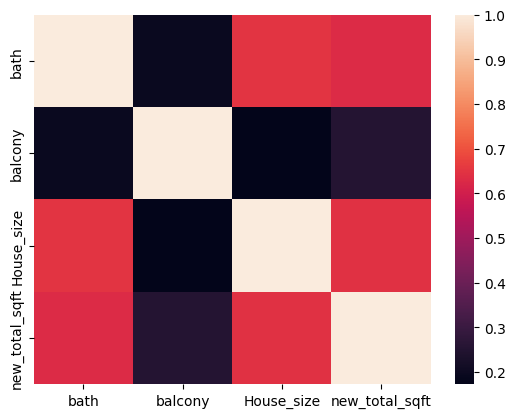

In [18]:
sns.heatmap(corr)

In [19]:
df["new_total_sqft"].isnull().sum()

0

In [20]:
df.isnull().sum()

location            1
total_sqft          0
bath                0
balcony           126
price               0
House_size          0
new_total_sqft      0
dtype: int64

In [21]:
df["balcony"].value_counts()

balcony
2.0    3139
1.0    2537
3.0     860
0.0     335
Name: count, dtype: int64

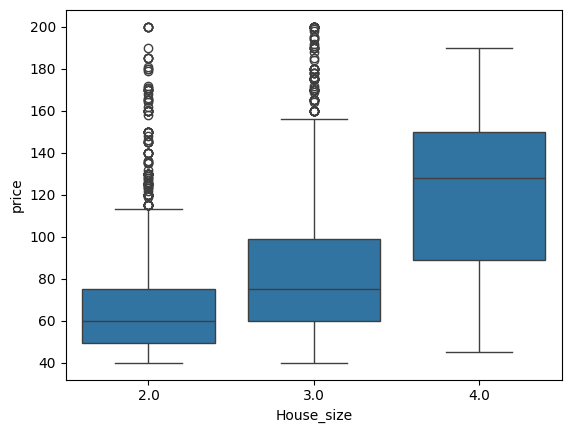

In [22]:
sns.boxplot(df, y='price', x='House_size');

In [23]:
df['price'].corr(df['House_size'])

0.34942737806394203

In [24]:
df.dropna(subset=['location'], inplace=True, axis=0)

In [25]:
df.isnull().sum()

location            0
total_sqft          0
bath                0
balcony           126
price               0
House_size          0
new_total_sqft      0
dtype: int64

In [26]:
df.value_counts()

location            total_sqft  bath  balcony  price  House_size  new_total_sqft
Haralur Road        1243        2.0   2.0      46.0   2.0         1243.0            16
TC Palaya           1200        2.0   0.0      66.0   3.0         1200.0            13
HSR Layout          1140        2.0   2.0      46.0   2.0         1140.0             9
Haralur Road        1194        2.0   2.0      47.0   2.0         1194.0             8
Parappana Agrahara  1194        2.0   2.0      47.0   2.0         1194.0             7
                                                                                    ..
Hebbal              1053        2.0   1.0      48.0   2.0         1053.0             1
                    1040        2.0   2.0      46.0   2.0         1040.0             1
                                      1.0      55.0   2.0         1040.0             1
                                               50.0   2.0         1040.0             1
tc.palya            1400        2.0   1.0      78

In [27]:
balcony_avg = df["balcony"].mean().round()

In [28]:
df['balcony'].fillna(balcony_avg, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16808\1595081261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].fillna(balcony_avg, inplace=True)


In [37]:
df.shape

(4492, 6)

In [30]:
df.head()

,location,total_sqft,bath,balcony,price,House_size,new_total_sqft
2,Uttarahalli,1440,2.0,3.0,62.00,3.0,1440.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0,1521.0
4,Kothanur,1200,2.0,1.0,51.00,2.0,1200.0
8,Marathahalli,1310,3.0,1.0,63.25,3.0,1310.0
10,Whitefield,1800,2.0,2.0,70.00,3.0,1800.0


In [31]:
df.drop(columns=["total_sqft"], inplace=True)

In [38]:
cleaned_df = df.copy()  # Create a copy of the original DataFrame
# Perform cleaning operations on cleaned_df as needed

# Save the cleaned DataFrame to a CSV file
cleaned_df.to_csv('cleaned_data.csv', index=False)